In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import csv
import matplotlib.dates as mdates

In [4]:
obs = pd.read_excel("observed.xlsx")
obs["obs"] = pd.to_datetime(obs["obs"], format="%Y-%m-%d")
obs

,sites,fish ID,obs
0,NECHAKO RIVER AT VANDERHOOF,4,2022-08-27
1,NECHAKO RIVER AT VANDERHOOF,5,2022-08-27
2,NECHAKO RIVER AT VANDERHOOF,10,2022-08-28


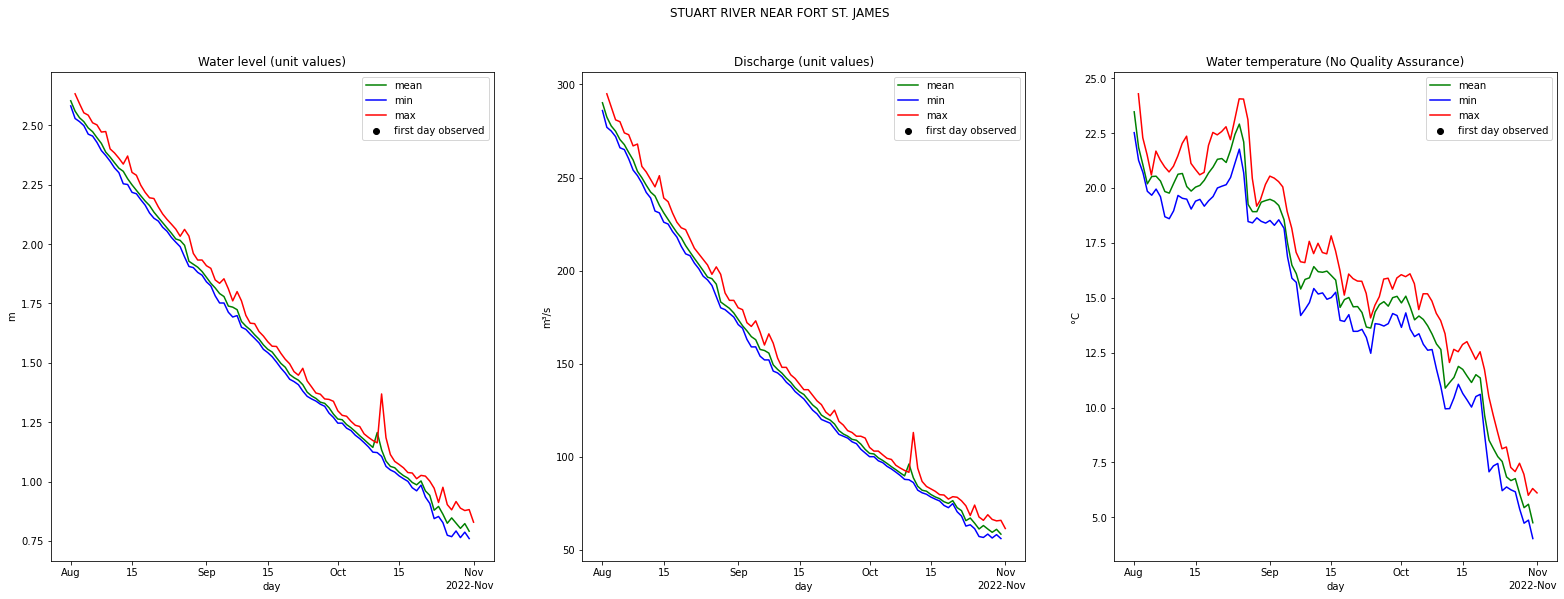

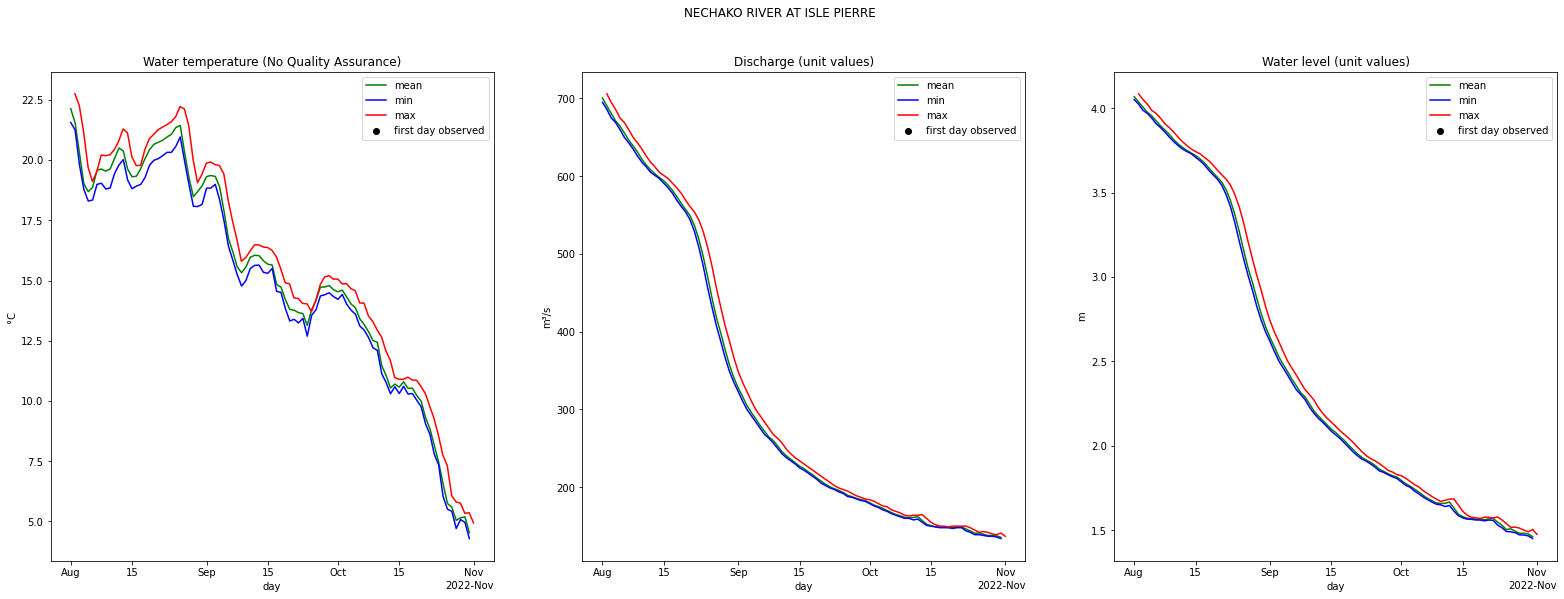

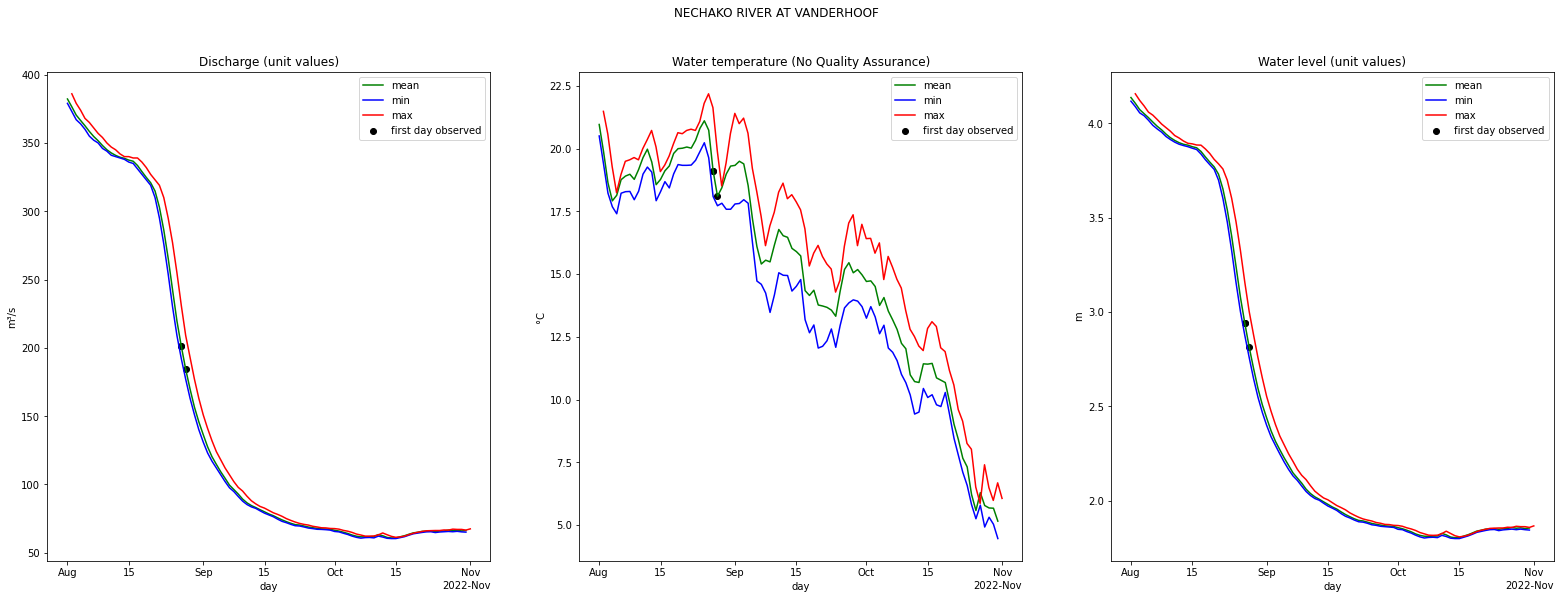

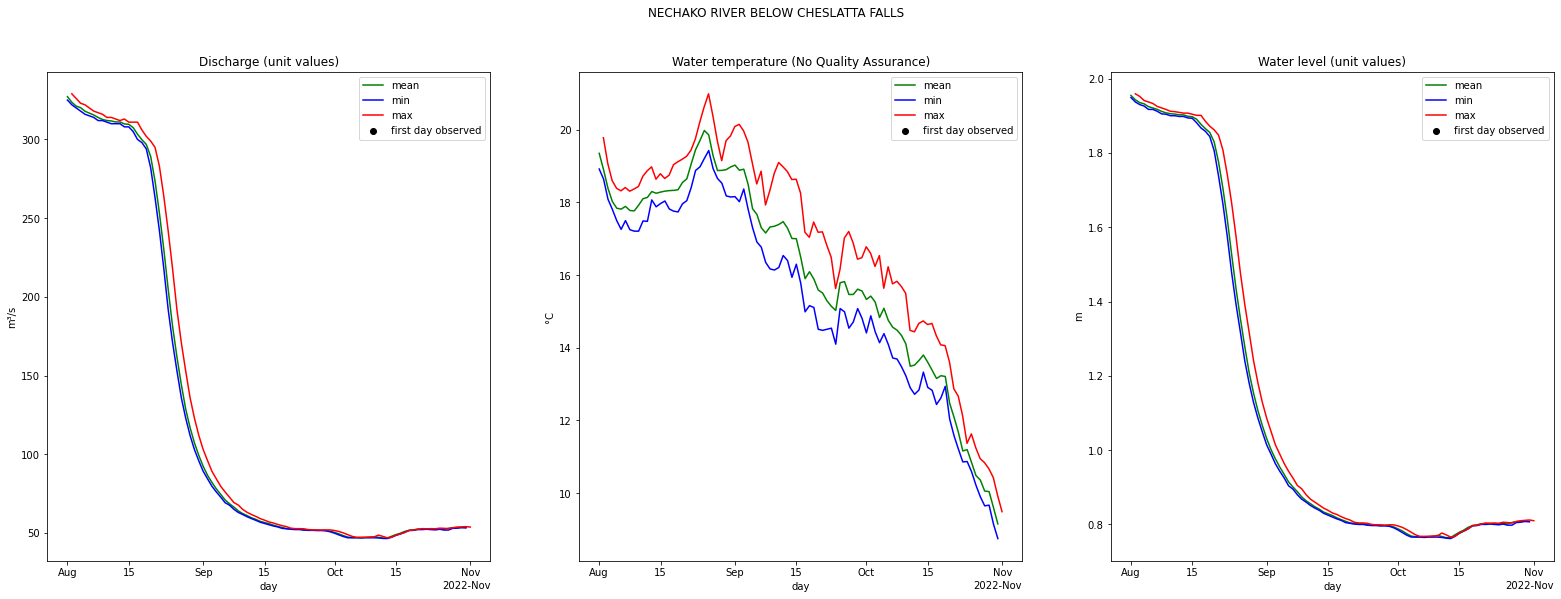

In [5]:

folders = glob("waters data/*")
for folder in folders:
    csv_files = glob(f'{folder}/*.csv')
    title = folder.split("-")[1].strip()
    plt.figure(figsize=(27, 9), facecolor="white")
    plt.suptitle(title)
    j = 0
    observed = obs.loc[obs["sites "] == title, :]
    for csv_file in csv_files:
        j += 1
        plt.subplot(1, len(csv_files), j)
        csvfile = open(csv_file, 'r')
        i = 0
        for row in csv.reader(csvfile, delimiter = ','):
            i += 1
            if i == 8:
                title, unit = row[1:]
                break
        plt.title(title)
        plt.ylabel(unit)
        plt.xlabel("day")
        csv_data = pd.read_csv(csv_file, delimiter=",", skiprows=8).iloc[:, [0, 2]]
        cols = csv_data.columns
        columns = csv_data.columns.difference([cols[0]])
        csv_data[columns] = csv_data[columns].astype(float)
        csv_data[cols[0]] = pd.to_datetime(csv_data[cols[0]], format="%Y-%m-%d %H:%M:%S")
        csv_data = csv_data.resample('d', on=cols[0])
        mean_dict = {                                                                                                             
            cols[0]: 'first',                                                                                                    
            cols[1]: 'mean',
        }
        means = csv_data.apply(mean_dict)
        mins = csv_data.min()
        maxs = csv_data.max()
        observed = observed.merge(means, "inner", right_index=True, left_on = "obs")
        plt.plot(*means.to_numpy().T, color = "green", label = "mean")
        plt.plot(*mins.to_numpy().T, color = "blue", label = "min")
        plt.plot(*maxs.to_numpy().T, color = "red", label = "max")
        plt.scatter(observed["obs"], observed[cols[1]], color = "k", label = "first day observed")
        ax = plt.gca()
        locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
        formatter = mdates.ConciseDateFormatter(locator)
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)
        plt.legend()
    plt.savefig(f"{folder}/fig.jpeg");

In [23]:
import pyreadr as pyr

result = pyr.read_r('Vanderhoof_station_data_2006_2019.Rdata')
vanderhoof_t = result['Temperature']

In [24]:
vanderhoof_t

,Station,Temperature,Date
0,Vanderhoof,0.90,2006-01-01
1,Vanderhoof,0.90,2006-01-02
2,Vanderhoof,0.90,2006-01-03
3,Vanderhoof,0.90,2006-01-04
4,Vanderhoof,0.90,2006-01-05
...,...,...,...
5108,Vanderhoof,0.08,2019-12-27
5109,Vanderhoof,0.08,2019-12-28
5110,Vanderhoof,0.08,2019-12-29
5111,Vanderhoof,0.08,2019-12-30
